In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from PIL import Image
import joblib

In [14]:
dataTest = pd.read_csv("fashion-mnist_test.csv", dtype=float)
dataTest.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,8.0,...,103.0,87.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,53.0,99.0,...,0.0,0.0,0.0,0.0,63.0,53.0,31.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,137.0,126.0,140.0,0.0,133.0,224.0,222.0,56.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,0.0,0.0,0.0,0.0,44.0,105.0,44.0,10.0,...,105.0,64.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,174.0,136.0,155.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0
8,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57.0,70.0,28.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [3]:
dataTest.count()

label       10000
pixel1      10000
pixel2      10000
pixel3      10000
pixel4      10000
            ...  
pixel780    10000
pixel781    10000
pixel782    10000
pixel783    10000
pixel784    10000
Length: 785, dtype: int64

In [4]:
dataTrain = pd.read_csv("fashion-mnist_train.csv", dtype=float)
dataTrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dataTrain.count()

label       60000
pixel1      60000
pixel2      60000
pixel3      60000
pixel4      60000
            ...  
pixel780    60000
pixel781    60000
pixel782    60000
pixel783    60000
pixel784    60000
Length: 785, dtype: int64

In [6]:
dataArrayTrain = dataTrain.values
dataArrayTest = dataTest.values

In [7]:
dataArrayTrain[:,1:] = dataArrayTrain[:,1:] / 255
dataArrayTest[:,1:] = dataArrayTest[:,1:] / 255

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(20,), activation='logistic', solver='sgd', verbose=True, random_state=1, max_iter=600, alpha=0.001, learning_rate_init=0.01)

In [9]:
mlp.fit(dataArrayTrain[:,1:], dataArrayTrain[:,0])

Iteration 1, loss = 1.61889219
Iteration 2, loss = 0.93550796
Iteration 3, loss = 0.75066684
Iteration 4, loss = 0.66149589
Iteration 5, loss = 0.60347378
Iteration 6, loss = 0.56246000
Iteration 7, loss = 0.53279533
Iteration 8, loss = 0.51048033
Iteration 9, loss = 0.49318674
Iteration 10, loss = 0.47940422
Iteration 11, loss = 0.46781206
Iteration 12, loss = 0.45784161
Iteration 13, loss = 0.44927764
Iteration 14, loss = 0.44178256
Iteration 15, loss = 0.43505328
Iteration 16, loss = 0.42923407
Iteration 17, loss = 0.42367031
Iteration 18, loss = 0.41875813
Iteration 19, loss = 0.41457603
Iteration 20, loss = 0.41035933
Iteration 21, loss = 0.40657210
Iteration 22, loss = 0.40302698
Iteration 23, loss = 0.39956679
Iteration 24, loss = 0.39688234
Iteration 25, loss = 0.39345955
Iteration 26, loss = 0.39043048
Iteration 27, loss = 0.38796723
Iteration 28, loss = 0.38529266
Iteration 29, loss = 0.38281348
Iteration 30, loss = 0.38053981
Iteration 31, loss = 0.37846504
Iteration 32, los

D:\program\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(20,),
              learning_rate_init=0.01, max_iter=600, random_state=1,
              solver='sgd', verbose=True)

In [10]:
print("Training set score: %f" % mlp.score(dataArrayTrain[:,1:], dataArrayTrain[:,0]))

Training set score: 0.926400


In [13]:
print("Test set score: %f" % mlp.score(dataArrayTest[:,1:], dataArrayTest[:,0]))

Test set score: 0.878800


In [23]:
mlp.predict(dataArrayTest[1:2,1:])

array([1.])

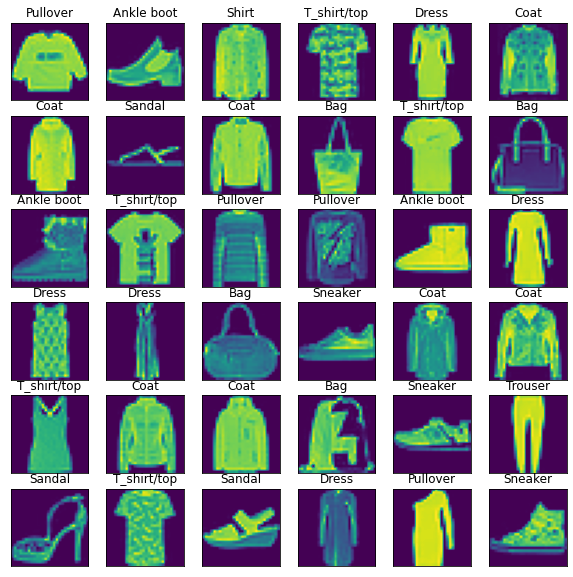

In [29]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(dataArrayTrain[i,1:].reshape((28,28)))
    label_index = int(dataArrayTrain[i,0:1])
    plt.title(class_names[label_index])
plt.show()